#  第三讲 随机网络实践一

In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常
# 关注B站和公众号：单哥的科研日常，获取更多讲解教程

### 实验环境：
### Python版本==3.9.16, networkx==3.0, matplotlib==3.6.3

## 1、几种常见的规则网络的生成与可视化

In [1]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt

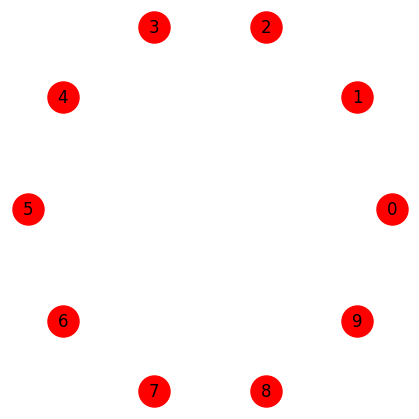

In [2]:
n = 10
# 创建孤立节点图
G1 = nx.Graph()
G1.add_nodes_from(list(range(n)))
plt.figure(figsize=(4,4))
nx.draw(G1, pos=nx.circular_layout(G1), node_size=500, node_color="red",with_labels=True)
# plt.savefig("孤立图.pdf") # 保存可视化结果

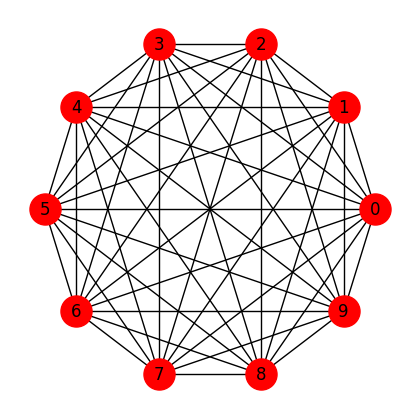

In [3]:
# 创建完全图
G2 = nx.complete_graph(n)
plt.figure(figsize=(4,4))
nx.draw(G2, pos=nx.circular_layout(G2), node_size=500, node_color="red",with_labels=True)
# plt.savefig("完全图.pdf")

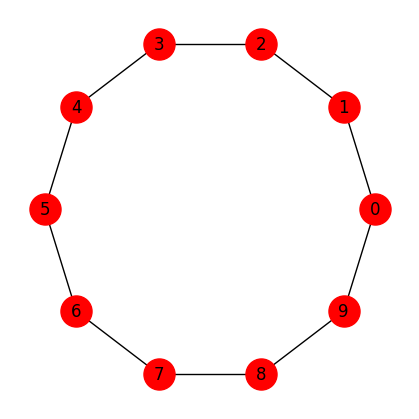

In [4]:
# 创建一维环状图
G3 = nx.cycle_graph(n)
plt.figure(figsize=(4,4))
nx.draw(G3, pos=nx.circular_layout(G3), node_size=500, node_color="red",with_labels=True)
# plt.savefig("一维环状图.pdf")

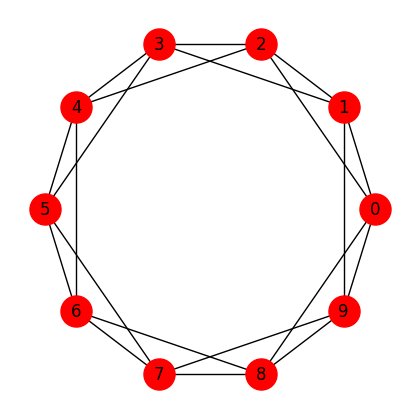

In [5]:
# K近邻规则（耦合）图
G4 = nx.watts_strogatz_graph(n,4,0)
plt.figure(figsize=(4,4))
nx.draw(G4, pos=nx.circular_layout(G4), node_size=500, node_color="red",with_labels=True)
# plt.savefig("K近邻规则图.pdf")

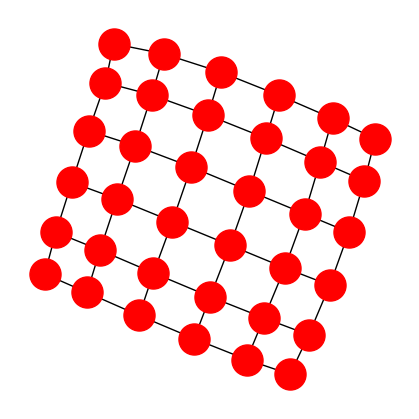

In [6]:
# 二维方格图
G5 = nx.grid_graph((6,6), periodic=False)
plt.figure(figsize=(4,4))
nx.draw(G5, node_size=500, node_color="red",with_labels=False)
# plt.savefig("二维方格图.pdf")

## 2、随机网络的两种生成算法

### 第一种：G(N,L)

In [7]:
import random
import itertools

In [8]:
def GNL(N, L):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    nlist = list(G)
    edge_count = 0
    while edge_count < L:
        # generate random edge,u,v
        u = random.choice(nlist)
        v = random.choice(nlist)
        if u == v or G.has_edge(u, v):
            continue
        else:
            G.add_edge(u, v)
            edge_count += 1
    return G

G = GNL(100, 200)

### 第二种：G(N,p)

In [9]:
def GNP(N, p):
    edges = itertools.combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for e in edges:
        if random.random() < p:
            G.add_edge(*e)
    return G

GNP = GNP(100, 0.6)

Text(0.5, 1.0, 'G(N,p)')

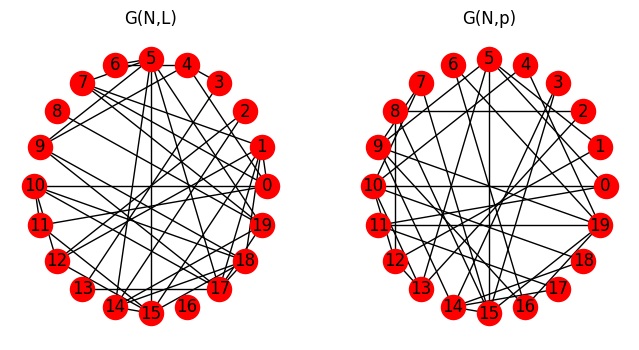

In [10]:
# 可以直接调用库函数来生成这两种网络
n, m, p = 20,40,0.2
g1 = nx.gnm_random_graph(n, m)
g2 = nx.gnp_random_graph(n, p)

plt.figure(figsize=(8,4))

plt.subplot(121)
nx.draw(g1, pos=nx.circular_layout(g1), node_size=300, node_color="red",with_labels=True)
plt.title("G(N,L)")

plt.subplot(122)
nx.draw(g2, pos=nx.circular_layout(g2), node_size=300, node_color="red",with_labels=True)
plt.title("G(N,p)")